<a href="https://colab.research.google.com/github/RogerSchwartz/preditor-pre-o-de-casas-po-o-de-caldas/blob/main/preditor_pre%C3%A7o_de_casas_po%C3%A7o_de_caldas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import tarfile
from six.moves import urllib
HOUSING_PATH = os.path.join("datasets", "data")

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "imoveis_pocos.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,valor,classe,dormitorios,banheiros,vagas_na_garagem,tipo_do_imovel,bairro,area_terreno,area_util,condominio,...,elevador_social,suites,apartamento_por_andar,quantidade_de_andares,elevador_de_servico,salao_de_festa,iptu,lat,long,dist_centro
0,280000.0,Casa,2.0,1.0,2.0,Padrão,jardim sao bento,206.0,134.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.834613,-46.572337,5.179980
1,350000.0,Apartamento,2.0,1.0,NaN,Padrão,centro,NaN,71.0,55.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-21.788380,-46.566182,0.000000
2,3000000.0,Terreno,NaN,NaN,NaN,Padrão,jardim campos elisios,3200.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,450000.0,Apartamento,2.0,2.0,2.0,Padrão,jardim dos estados,NaN,72.0,230.0,...,1.0,1.0,7.0,4.0,1.0,NaN,NaN,-21.782685,-46.559694,0.921824
4,1350000.0,Casa,5.0,4.0,6.0,Padrão,sao benedito,297.0,483.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,-21.855860,-46.571666,7.524761


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   valor                  924 non-null    float64
 1   classe                 924 non-null    object 
 2   dormitorios            774 non-null    float64
 3   banheiros              799 non-null    float64
 4   vagas_na_garagem       740 non-null    float64
 5   tipo_do_imovel         924 non-null    object 
 6   bairro                 924 non-null    object 
 7   area_terreno           460 non-null    float64
 8   area_util              430 non-null    float64
 9   condominio             438 non-null    float64
 10  torres                 301 non-null    float64
 11  portaria_hrs           134 non-null    float64
 12  elevador_social        230 non-null    float64
 13  suites                 520 non-null    float64
 14  apartamento_por_andar  353 non-null    float64
 15  quanti

In [6]:
housing["classe"].value_counts()

Apartamento    432
Casa           334
Terreno        119
Comercial       33
Rurais           6
Name: classe, dtype: int64

In [7]:
housing.describe()

,valor,dormitorios,banheiros,vagas_na_garagem,area_terreno,area_util,condominio,torres,portaria_hrs,elevador_social,suites,apartamento_por_andar,quantidade_de_andares,elevador_de_servico,salao_de_festa,iptu,lat,long,dist_centro
count,9.240000e+02,774.000000,799.000000,740.000000,460.000000,430.000000,438.000000,301.000000,134.000000,230.000000,520.000000,353.000000,358.000000,135.000000,117.0,172.000000,600.000000,600.000000,600.000000
mean,5.744911e+05,2.686047,2.023780,2.037838,1285.140304,179.077651,2469.914315,2.089701,20.007463,1.178261,1.332692,3.934844,6.611732,1.044444,0.0,175.934012,-21.798190,-46.566503,2.468926
std,5.486207e+05,0.900416,1.204913,1.398308,8343.071182,1157.836651,45379.352934,3.095469,6.459237,0.589913,0.725856,4.345681,4.256822,0.206848,0.0,678.629161,0.021928,0.023237,2.605554
min,5.600000e+04,1.000000,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.0,1.000000,-21.857558,-46.642078,0.000000
25%,2.500000e+05,2.000000,1.000000,1.000000,258.375000,65.000000,112.500000,1.000000,12.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.0,54.025000,-21.799761,-46.571666,0.921824
50%,3.900000e+05,3.000000,2.000000,2.000000,337.650000,90.000000,233.500000,1.000000,24.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.0,80.625000,-21.790032,-46.566182,1.651073
75%,6.925000e+05,3.000000,2.000000,2.000000,500.000000,127.000000,397.500000,1.000000,24.000000,1.000000,1.000000,4.000000,10.000000,1.000000,0.0,136.250000,-21.788380,-46.559694,3.368500
max,4.999999e+06,10.000000,10.000000,10.000000,163000.000000,24000.000000,950000.000000,19.000000,24.000000,6.000000,5.000000,30.000000,18.000000,2.000000,0.0,8000.000000,-21.702056,-46.476850,12.976763


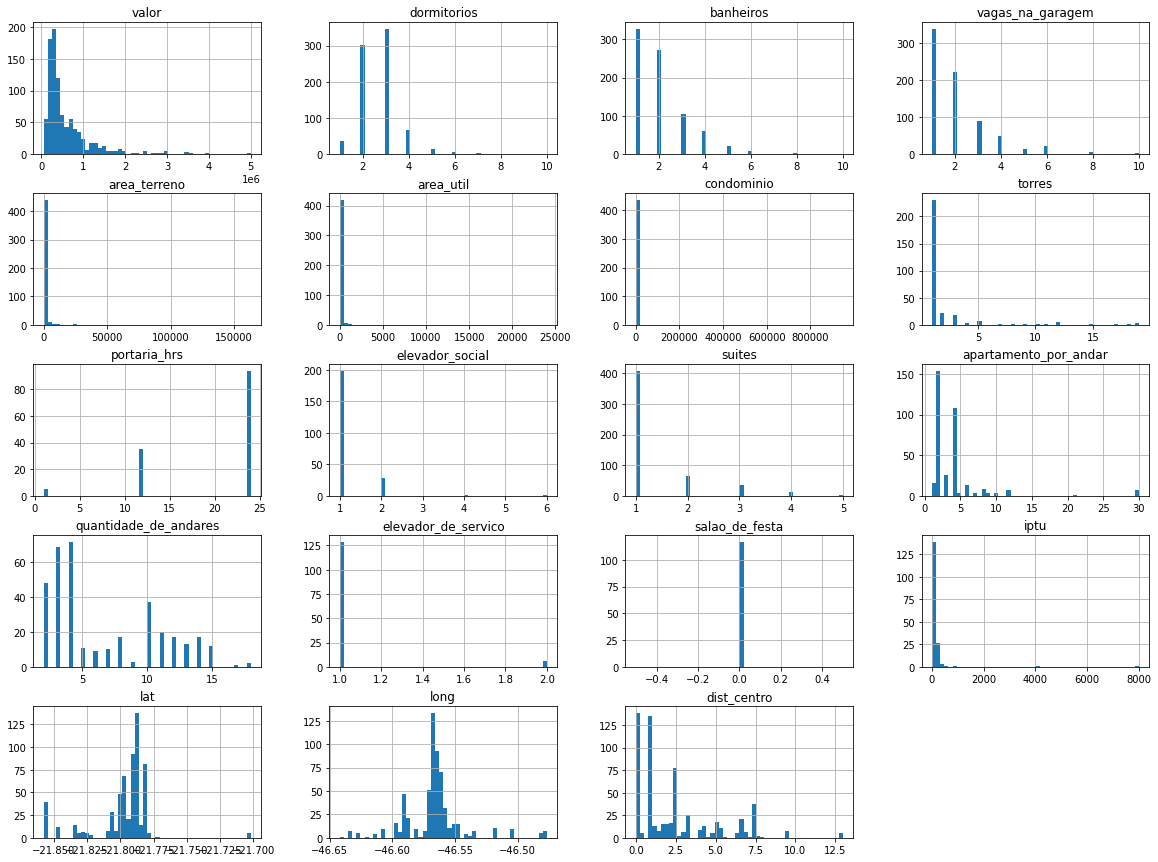

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
len(train_set)

740

In [13]:
len(test_set)

184

In [ ]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]